In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

import os
os.environ["KERAS_BACKEND"] = "torch"

from keras_core.models import Sequential
from keras_core.layers import Dense, Input
from keras_core.regularizers import l2
from keras_core.layers import Dropout
from keras_core.callbacks import EarlyStopping

Using PyTorch backend.


In [2]:
train = pd.read_csv('../train_complete.csv')
train.dropna(thresh = train.shape[0]*0.8, axis = 1, inplace = True)

In [3]:
column_keep = train.drop(columns='Incidence').columns

In [4]:
train_dummy = pd.get_dummies(train, columns=['Age'], drop_first=True)

In [5]:
test = pd.read_csv('../test_complete.csv')

In [6]:
test = test[column_keep]

In [7]:
test_dummy = pd.get_dummies(test, columns=['Age'], drop_first=True)

In [8]:
test_numeric = test_dummy.drop(columns=['ID','State_Name'])

In [9]:
X = train_dummy.drop(columns=['Incidence','ID','State_Name'])
y = train_dummy['Incidence']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [11]:
it_imp = IterativeImputer(max_iter=100)
X_train = it_imp.fit_transform(X_train)
X_test = it_imp.transform(X_test)
test_numeric = it_imp.transform(test_numeric)

In [13]:
# Model
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit it
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=512
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24530390.0000 - mae: 4709.6763 - val_loss: 24588016.0000 - val_mae: 4761.4966
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24387020.0000 - mae: 4697.6572 - val_loss: 24588016.0000 - val_mae: 4761.4966
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23978176.0000 - mae: 4665.2705 - val_loss: 24588000.0000 - val_mae: 4761.4927
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24344840.0000 - mae: 4695.7222 - val_loss: 24588000.0000 - val_mae: 4761.4927
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23915380.0000 - mae: 4649.8540 - val_loss: 24588000.0000 - val_mae: 4761.4927
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24014136.0000 - mae: 4659.8530 - val_loss: 24588000.0000 - val_mae: 4761.4927
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23853158.0000 - mae: 4648.5493 - val_loss: 24587962.0000 - val_mae: 4761.4922
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 240879

In [12]:
# Model
model_l2 = Sequential()
model_l2.add(Input((X.shape[1],)))
model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_l2.add(Dense(1))
# Compile it
model_l2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit it
history_l2 = model_l2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=512
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21880070.0000 - mae: 4415.8013 - val_loss: 20075046.0000 - val_mae: 4249.0444
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19234518.0000 - mae: 4102.2856 - val_loss: 17439242.0000 - val_mae: 3920.6960
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16554342.0000 - mae: 3757.2507 - val_loss: 15154181.0000 - val_mae: 3612.7627
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14602558.0000 - mae: 3483.6077 - val_loss: 12902357.0000 - val_mae: 3278.2014
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12295119.0000 - mae: 3127.4648 - val_loss: 10562971.0000 - val_mae: 2885.8513
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9989498.0000 - mae: 2722.4622 - val_loss: 8243946.5000 - val_mae: 2431.0640
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7819790.5000 - mae: 2266.2385 - val_loss: 6129675.5000 - val_mae: 1938.2467
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5689271.00

In [15]:
import matplotlib.pyplot as plt

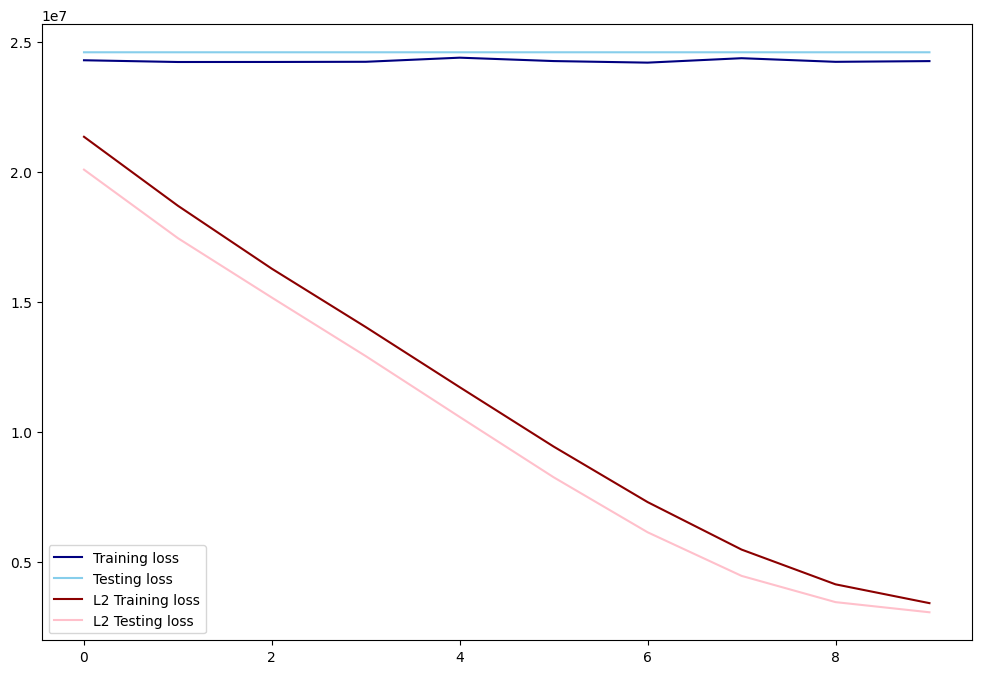

In [17]:
# Visualize loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_loss_l2 = history_l2.history['loss']
test_loss_l2 = history_l2.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2 Training loss', color='darkred')
plt.plot(test_loss_l2, label='L2 Testing loss', color='pink')
plt.legend();

In [24]:
# Build a model using Dropout
# Model
model_dropout = Sequential()
model_dropout.add(Input((X.shape[1],)))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.2)) 
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1))
# Compile it
model_dropout.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit it
history_dropout = model_dropout.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21869684.0000 - mae: 4405.9062 - val_loss: 13676859.0000 - val_mae: 3333.5688
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 10420431.0000 - mae: 2750.7834 - val_loss: 4275803.0000 - val_mae: 1520.3850
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 4177273.0000 - mae: 1586.3204 - val_loss: 3074698.0000 - val_mae: 1514.1156
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 3704228.2500 - mae: 1535.6909 - val_loss: 2751860.5000 - val_mae: 1402.0442
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 3331899.0000 - mae: 1472.3041 - val_loss: 2440941.2500 - val_mae: 1332.0742
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 2992526.7500 - mae: 1397.2197 - val_loss: 2194965.0000 - val_mae: 1265.9644
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 2758968.0000 - mae: 1340.7319 - val_loss: 2059152.8750 - val_mae: 1202.4974
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/

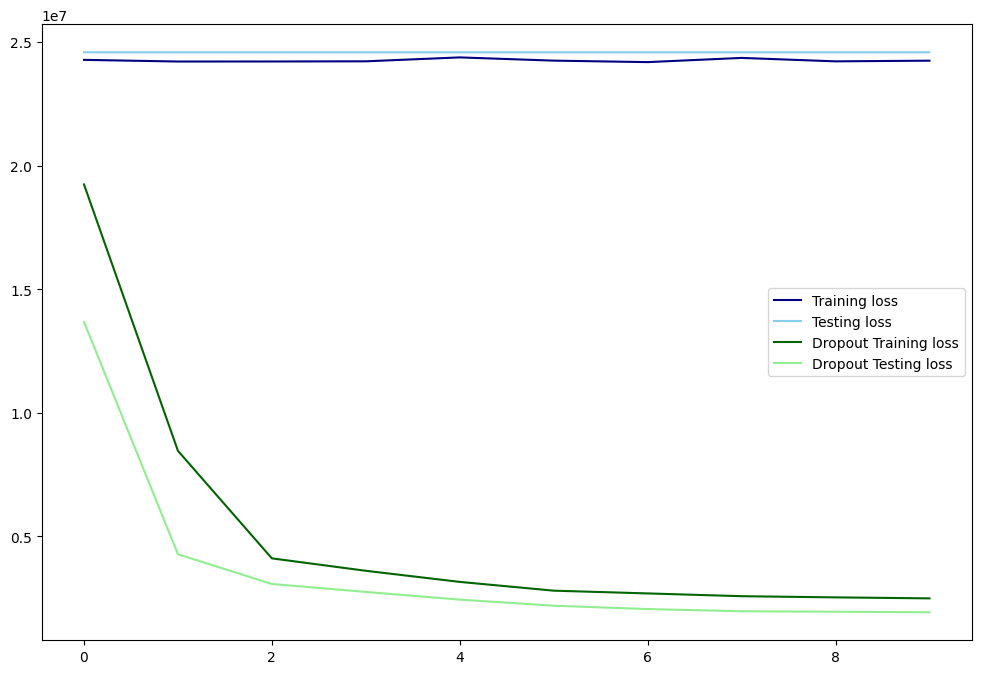

In [25]:
# Visualize loss
train_loss_dropout = history_dropout.history['loss']
test_loss_dropout = history_dropout.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_dropout, label='Dropout Training loss', color='darkgreen')
plt.plot(test_loss_dropout, label='Dropout Testing loss', color='lightgreen')
plt.legend();

In [26]:
# Build model using early stopping
model_es = Sequential()
model_es.add(Input((X.shape[1],)))
model_es.add(Dense(64, activation='relu'))
model_es.add(Dense(32, activation='relu'))
model_es.add(Dense(1))

# Compile it
model_es.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Fit it
history_es = model_es.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 25643954.0000 - mae: 4823.4458 - val_loss: 19095748.0000 - val_mae: 4079.2400
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 16362277.0000 - mae: 3711.4805 - val_loss: 9894034.0000 - val_mae: 2662.3499
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 7665521.0000 - mae: 2203.7529 - val_loss: 4094748.0000 - val_mae: 1586.0460
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 3925728.7500 - mae: 1576.7147 - val_loss: 3401968.0000 - val_mae: 1567.4905
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 3240785.7500 - mae: 1510.8202 - val_loss: 2963041.0000 - val_mae: 1457.6473
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 2869806.7500 - mae: 1419.4113 - val_loss: 2594914.5000 - val_mae: 1367.7360
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 2447161.5000 - mae: 1311.4574 - val_loss: 2294307.2500 - val_mae: 1306.7692
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 708u

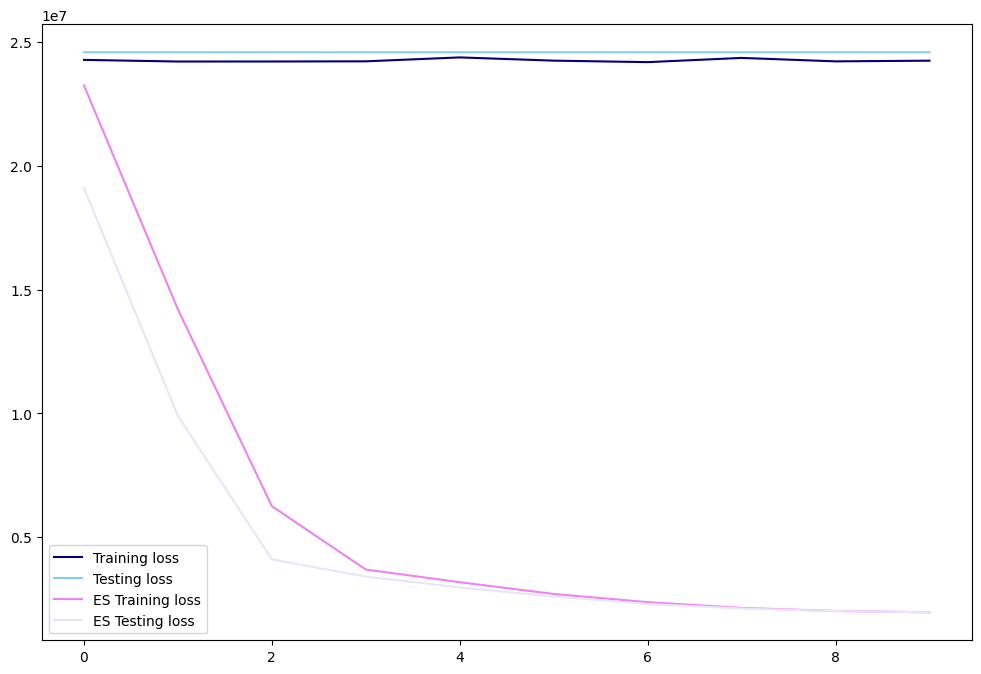

In [27]:
# Visualize loss
train_loss_es = history_es.history['loss']
test_loss_es = history_es.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_es, label='ES Training loss', color='violet')
plt.plot(test_loss_es, label='ES Testing loss', color='lavender')
plt.legend();